This code uses the random forest classifier identified as having the best performance during model evaluation. The model is trained & tested on the E. coli dataset, and the results of prediction visualized as a confusion matrix.

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [18]:
#Import data
dataset = pd.read_csv('ecoli.csv', header = None)
print(dataset.shape)

(327, 8)


In [19]:
#Split into features & labels
data = dataset.values
x, y = data[:, :-1], data[:, -1]

In [20]:
#Encode target labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

print(x.shape, y.shape, Counter(y))

(327, 7) (327,) Counter({0: 143, 1: 77, 4: 52, 2: 35, 3: 20})


In [21]:
#Split data into training & test datasets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 0)

print('Training features shape:', x_train.shape)
print('Training labels shape:', y_train.shape)
print('Testing features shape:', x_test.shape)
print('Testing labels shape:', y_test.shape)

Training features shape: (196, 7)
Training labels shape: (196,)
Testing features shape: (131, 7)
Testing labels shape: (131,)


In [22]:
#Train random forest classifier (identified as having best performance during model evaluation)
from sklearn.ensemble import RandomForestClassifier

#Define model
model = RandomForestClassifier(n_estimators = 1000)

#Fit model on entire training set
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [23]:
#Test model on unseen data
y_pred = list(model.predict(x_test))

#Convert labels back to strings
y_pred_str = le.inverse_transform(y_pred)
y_test_str = le.inverse_transform(list(y_test))

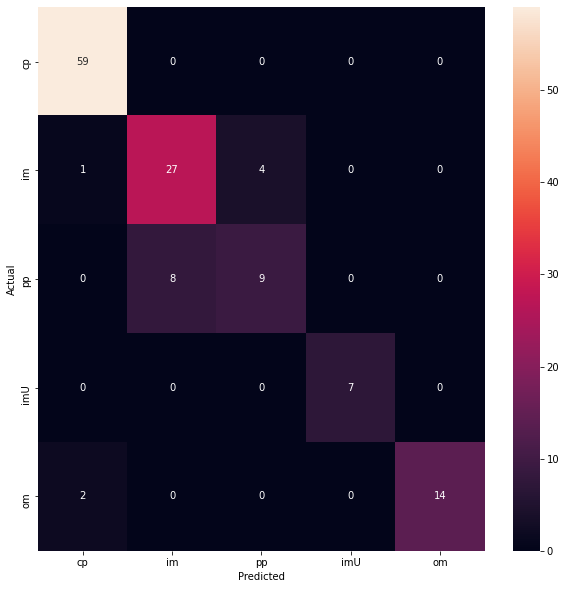

88.55% of predictions made using the random forest model were correct


In [24]:
#Visualize results using confusion matrix (predicted classes vs. target classes)
from sklearn import metrics

#Set up confusion matrix
conf_mat = metrics.confusion_matrix(y_test_str, y_pred_str)
fig, ax = plt.subplots(figsize = (10, 10))
poss_classes = ["cp", "im", "pp", "imU", "om"]

sns.heatmap(conf_mat, annot = True, fmt = 'd',
            xticklabels = poss_classes, yticklabels = poss_classes)

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#Print % predictions that were accurate
percent_accuracy = "{:.2f}".format(metrics.accuracy_score(y_test, y_pred) * 100)
print(percent_accuracy + "% of predictions made using the random forest model were correct")